# Project: Wrangling and Analyze Data

In [3125]:
#import packages 
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import re
import datetime

#pandas to read dataframes 
pd.options.display.max_rows
pd.set_option('display.max_colwidth', 0)
pd.options.mode.chained_assignment=None

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced-2.csv)

In [3126]:
# load and read twitter data of WeRateDogs proveded by udacity
df_twitter_archive = pd.read_csv('twitter-archive-enhanced-2.csv')
df_twitter_archive.head(-5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600524156928/photo/1,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090499244032/photo/1,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525042405380/photo/1,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None


In [3127]:
#Info_twitter_archive
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

2. Use the Requests library to download the tweet image prediction (image-predictions-3.tsv)

In [3128]:
#import image_prediction.tsv
url = 'https://video.udacity-data.com/topher/2018/November/5bf60c69_image-predictions-3/image-predictions-3.tsv'
response = requests.get(url)
with open(url.split('/')[-1], mode = 'wb') as file: 
    file.write(response.content)

In [3129]:
# check if request worked. successful HTTP request will return a 200 response
response.status_code

200

In [3130]:
# load prediction and check the dataframe
df_prediction = pd.read_csv('image-predictions-3.tsv', sep='\t')
df_prediction.head(-5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False


In [3131]:
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet-json.txt)

In [3132]:
with open ('tweet-json.txt') as f:
     df_api = pd.DataFrame((json.loads(line) for line in f), columns = ['id', 'favorite_count', 'retweet_count','retweeted', 'display_text_range'])

In [3133]:
df_api.head()

,id,favorite_count,retweet_count,retweeted,display_text_range
0,892420643555336193,39467,8853,False,"[0, 85]"
1,892177421306343426,33819,6514,False,"[0, 138]"
2,891815181378084864,25461,4328,False,"[0, 121]"
3,891689557279858688,42908,8964,False,"[0, 79]"
4,891327558926688256,41048,9774,False,"[0, 138]"


In [3134]:
#rename columns
df_api.columns = ['tweet_id', 'favorites', 'retweets', 'retweeted', 'tweet_length']
df_api.head()

,tweet_id,favorites,retweets,retweeted,tweet_length
0,892420643555336193,39467,8853,False,"[0, 85]"
1,892177421306343426,33819,6514,False,"[0, 138]"
2,891815181378084864,25461,4328,False,"[0, 121]"
3,891689557279858688,42908,8964,False,"[0, 79]"
4,891327558926688256,41048,9774,False,"[0, 138]"


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [3135]:
#visual assessment of twitter_archive
df_twitter_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1134,728653952833728512,NaN,NaN,2016-05-06 18:33:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Coleman. Somebody needs to tell him that he's sitting in chairs wrong. 8/10 https://t.co/O10zjJ2Ixs,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/728653952833728512/photo/1,https://twitter.com/dog_rates/status/728653952833728512/photo/1,https://twitter.com/dog_rates/status/728653952833728512/photo/1",8,10,Coleman,None,None,None,None
1478,693590843962331137,NaN,NaN,2016-01-31 00:25:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Phil. He's big af. Currently destroying this nice family home. Completely uncalled for. 3/10 not a good pupper https://t.co/fShNNhBWYx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693590843962331137/photo/1,3,10,Phil,None,None,pupper,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None
897,759047813560868866,NaN,NaN,2016-07-29 15:27:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Spencer. He's part of the Queen's Guard. Takes his job very seriously. 11/10 https://t.co/8W5iSOgXfx,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/759047813560868866/photo/1,https://twitter.com/dog_rates/status/759047813560868866/photo/1",11,10,Spencer,None,None,None,None
662,790987426131050500,NaN,NaN,2016-10-25 18:44:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Misty. She has a cowboy hat on her nose. 12/10 https://t.co/Eno0mypHIr,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790987426131050500/photo/1,12,10,Misty,None,None,None,None
468,817056546584727552,NaN,NaN,2017-01-05 17:13:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Chloe. She fell asleep at the wheel. Absolute menace on the roadways. Sneaky tongue slip tho. 11/10 https://t.co/r6SLVN2VUH,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817056546584727552/photo/1,11,10,Chloe,None,None,None,None
2327,666407126856765440,NaN,NaN,2015-11-17 00:06:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a southern Vesuvius bumblegruff. Can drive a truck (wow). Made friends with 5 other nifty dogs (neat). 7/10 https://t.co/LopTBkKa8h,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666407126856765440/photo/1,7,10,a,None,None,None,None
1982,672968025906282496,NaN,NaN,2015-12-05 02:37:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gustaf. He's a purebred Chevy Equinox. Loves to shred. Gnarly lil pup. Great with the babes. 11/10 https://t.co/7CbO2eMAgJ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672968025906282496/photo/1,11,10,Gustaf,None,None,None,None
1623,684902183876321280,NaN,NaN,2016-01-07 00:59:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Perry. He's an Augustus Gloopster. Very condescending. Makes up for it with the sneaky tongue slip. 11/10 https://t.co/JVvIrUmTkR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684902183876321280/photo/1,11,10,Perry,None,None,None,None
941,752932432744185856,NaN,NaN,2016-07-12 18:27:35 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Carl. He's very powerful. 12/10 don't mess with Carl https://t.co/v5m2bIukXc,NaN

**Visual notes:** 
- Rating denominator is only on 10
- 4 stages of dogs -> doggo, floofer, pupper and puppo -> most entries says 'None'
- 'name' column is taken out of the 'text' column
- 'text' column begins usually with 'This is "dogs name"'
- Few columns seem to have only/mostly missing values
- Rating nominator is taken out of the 'text' column

In [3136]:
#programmatic assessment of twitter_archive
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [3137]:
#check if duplicate rows are available
df_twitter_archive.tweet_id.is_unique

True

In [3138]:
#list dogs name
df_twitter_archive.name.value_counts()

None        745
a           55 
Charlie     12 
Cooper      11 
Oliver      11 
            .. 
Ralphson    1  
Gabby       1  
Scott       1  
Ruffles     1  
Halo        1  
Name: name, Length: 957, dtype: int64

In [3139]:
#dogs name are capitalized -> check which entries are not dog names e.g. 'a'
no_name = df_twitter_archive.name.str.contains('^[a-z]', regex = True)
df_twitter_archive[no_name].name.value_counts()

a               55
the             8 
an              7 
very            5 
one             4 
quite           4 
just            4 
actually        2 
getting         2 
not             2 
mad             2 
his             1 
life            1 
such            1 
officially      1 
space           1 
light           1 
old             1 
all             1 
by              1 
infuriating     1 
my              1 
incredibly      1 
unacceptable    1 
this            1 
Name: name, dtype: int64

In [3140]:
#count of the no name
df_twitter_archive[no_name].name.count()

109

In [3141]:
#check pupper column
df_twitter_archive.pupper.value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [3142]:
#check floofer column
df_twitter_archive.floofer.value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [3143]:
#check puppo column
df_twitter_archive.puppo.value_counts()

None     2326
puppo    30  
Name: puppo, dtype: int64

In [3144]:
#check doggo column
df_twitter_archive.doggo.value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

**NOTES:**
-  745 'None' in the 'name' column
- 109 entries with no name in the 'name' column
- 2356 unique tweets
- Most entries in 'doggo', 'floofer', 'pupper'or 'puppo' are empty
- 'tweet_id', 'rating_numerator' and 'rating_denominator' are integers as should be
- 'timestamp should be a datetime

In [3145]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [3146]:
#checking rating numerator
df_twitter_archive.rating_numerator.value_counts().sort_index(ascending = False)

1776    1  
960     1  
666     1  
420     2  
204     1  
182     1  
165     1  
144     1  
143     1  
121     1  
99      1  
88      1  
84      1  
80      1  
75      2  
60      1  
50      1  
45      1  
44      1  
27      1  
26      1  
24      1  
20      1  
17      1  
15      2  
14      54 
13      351
12      558
11      464
10      461
9       158
8       102
7       55 
6       32 
5       37 
4       17 
3       19 
2       9  
1       9  
0       2  
Name: rating_numerator, dtype: int64

In [3147]:
#checking entries with numeator >10
df_twitter_archive[df_twitter_archive.rating_numerator > 10][['tweet_id', 'text' , 'rating_numerator']]

,tweet_id,text,rating_numerator
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12
...,...,...,...
2307,666826780179869698,12/10 simply brilliant pup https://t.co/V6ZzG45zzG,12
2324,666421158376562688,*internally screaming* 12/10 https://t.co/YMcrXC2Y6R,12
2329,666373753744588802,Those are sunglasses and a jean jacket. 11/10 dog cool af https://t.co/uHXrPkUEyl,11
2336,666273097616637952,Can take selfies 11/10 https://t.co/ws2AMaNwPW,11


In [3148]:
#checking entries with denominator > 10
df_twitter_archive[df_twitter_archive.rating_denominator != 10][['tweet_id', 'text' , 'rating_numerator']]

,tweet_id,text,rating_numerator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960
342,832088576586297345,@docmisterio account started on 11/15/15,11
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50


In [3149]:
df_twitter_archive[df_twitter_archive.rating_denominator != 10].tweet_id.count()

23

**NOTES**

-  32 entries with a denominator with ≠ 10
- 1455 entries with a denominator > 10, most of them between 10-15
- max rating_numerator is 1776 -> far to high
- mean rating_numerator is 13.126486, so there are rating_numerator entries above 10
- max rating_denominator is 170, even though the rating_denominator should be 10
- mean rating_denominator is 10.455433, even though the rating_denominator should be 10

In [3150]:
#visual assessment of df_prediction
df_prediction.sample(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1273,750026558547456000,https://pbs.twimg.com/media/CmieRQRXgAA8MV3.jpg,1,standard_poodle,0.258732,True,teddy,0.130760,False,toy_poodle,0.071726,True
606,679877062409191424,https://pbs.twimg.com/media/CW9olDsUsAA0XSf.jpg,1,hog,0.809466,False,hay,0.060178,False,lumbermill,0.016483,False
1308,753655901052166144,https://pbs.twimg.com/media/CnWGCpdWgAAWZTI.jpg,1,miniature_pinscher,0.456092,True,toy_terrier,0.153126,True,Italian_greyhound,0.144147,True
284,671141549288370177,https://pbs.twimg.com/media/CVBfrU9WUAApDeV.jpg,1,guinea_pig,0.387728,False,wood_rabbit,0.171681,False,borzoi,0.075358,True
679,683742671509258241,https://pbs.twimg.com/media/CX0kVRxWYAAWWZi.jpg,1,Pembroke,0.895279,True,Cardigan,0.022385,True,cocker_spaniel,0.017045,True
1854,841077006473256960,https://pbs.twimg.com/media/C6wbE5bXUAAh1Hv.jpg,1,Brittany_spaniel,0.962985,True,Blenheim_spaniel,0.014820,True,clumber,0.009557,True
971,706593038911545345,https://pbs.twimg.com/media/Cc5Snc7XIAAMidF.jpg,1,four-poster,0.696423,False,quilt,0.189312,False,pillow,0.029409,False
132,668466899341221888,https://pbs.twimg.com/media/CUbfGbbWoAApZth.jpg,1,shopping_basket,0.398361,False,hamper,0.363222,False,bassinet,0.084173,False
1769,827324948884643840,https://pbs.twimg.com/media/C3s_pYrXAAA1eqZ.jpg,1,golden_retriever,0.352486,True,toy_poodle,0.178884,True,Labrador_retriever,0.084164,True
1665,812503143955202048,https://pbs.twimg.com/media/C0aXTLqXEAADxBi.jpg,2,loupe,0.546856,False,web_site,0.345298,False,bubble,0.010528,False


In [3151]:
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**NOTES**

- 'img_num' column has no use
- In the 'jpg_url' column most of the links starts with 'https://pbs.twimg.com/media/'
- No missing data in the entries
- Entries in 'p1', 'p2' and 'p3' have different formats, some are capatalized while others are not
- 'p1# , 'p2' , and 'p3' and their '_dog' columns rate if there is a dog in the picture or not, but some entries are rated differently

In [3152]:
df_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [3153]:
df_prediction.tweet_id.is_unique

True

In [3154]:
df_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [3155]:
df_prediction[(df_prediction.p1_dog == False) & (df_prediction.p2_dog == False) & (df_prediction.p3_dog == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [3156]:
#324 entries have been definetly detected as no dogs
#checking how many dogs each prediction has found
df_prediction[(df_prediction.p1_dog == True)].tweet_id.count()

1532

In [3157]:
df_prediction[(df_prediction.p2_dog == True)].tweet_id.count()

1553

In [3158]:
df_prediction[(df_prediction.p3_dog == True)].tweet_id.count()

1499

In [3159]:
#p1_dog has mean and median higher '_conf' stats
#comparison to 'p2 & p3_dog'
df_prediction[(df_prediction.p1_dog == False) & (df_prediction.p2_dog == True) & (df_prediction.p3_dog == True)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
103,667806454573760512,https://pbs.twimg.com/media/CUSGbXeVAAAgztZ.jpg,1,toyshop,0.253089,False,Chihuahua,0.187155,True,Brabancon_griffon,0.112799,True
108,667878741721415682,https://pbs.twimg.com/media/CUTILFiWcAE8Rle.jpg,1,seat_belt,0.200373,False,miniature_pinscher,0.106003,True,schipperke,0.104733,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1896,850145622816686080,https://pbs.twimg.com/media/C8xS655XkAAv9vo.jpg,2,tennis_ball,0.714798,False,kelpie,0.105390,True,malinois,0.058553,True
1904,852189679701164033,https://pbs.twimg.com/media/C9OV99SXsAEmj1U.jpg,1,barrow,0.423150,False,Bernese_mountain_dog,0.415374,True,EntleBucher,0.067345,True
1984,872122724285648897,https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg,1,basketball,0.808396,False,pug,0.066736,True,dalmatian,0.054570,True


In [3160]:
#checking the '_conf' column of these entries
df_prediction[(df_prediction.p1_dog == False) & (df_prediction.p2_dog == True) & (df_prediction.p3_dog == True)].describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,1.010000e+02,101.000000,101.000000,101.000000,101.000000
mean,7.317826e+17,1.227723,0.580321,0.116103,0.060650
std,6.136353e+16,0.563581,0.288855,0.096532,0.049871
min,6.663379e+17,1.000000,0.090508,0.000010,0.000001
25%,6.765755e+17,1.000000,0.330573,0.038872,0.019076
50%,7.090422e+17,1.000000,0.518215,0.094615,0.052175
75%,7.829691e+17,1.000000,0.874431,0.181351,0.096995
max,8.793765e+17,4.000000,0.999984,0.430624,0.209213


**NOTES**
-  All max entries in the '_conf' column are ≤1
- 'p1_conf' column are higher than the other '_conf' columnns
- 2074 unique tweets ind df_prediction
- no missing data and null entries
- 101 entries the 'p1_dog' said there is no dog, while the 'p2 and p3_dog' said there is a dog

In [3161]:
#Visual assessment of df_api
df_api.sample(20)

,tweet_id,favorites,retweets,retweeted,tweet_length
1294,707969809498152960,2941,1097,False,"[0, 140]"
1749,678991772295516161,2537,1333,False,"[0, 95]"
1820,676575501977128964,2807,1254,False,"[0, 116]"
1193,717421804990701568,3446,945,False,"[0, 130]"
2139,669993076832759809,344,92,False,"[0, 125]"
2127,670290420111441920,750,315,False,"[0, 110]"
47,882992080364220416,24445,4122,False,"[0, 108]"
172,858471635011153920,22640,5271,False,"[0, 113]"
462,817423860136083457,38260,17504,False,"[0, 56]"
702,785927819176054784,12696,3652,False,"[0, 78]"


**NOTES**
-  All entries in 'retweeted' column are false

In [3162]:
#programmatic assessment of df_api
df_api.describe()

,tweet_id,favorites,retweets
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [3163]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tweet_id      2354 non-null   int64 
 1   favorites     2354 non-null   int64 
 2   retweets      2354 non-null   int64 
 3   retweeted     2354 non-null   bool  
 4   tweet_length  2354 non-null   object
dtypes: bool(1), int64(3), object(1)
memory usage: 76.0+ KB


In [3164]:
df_api.tweet_id.is_unique

True

In [3165]:
df_api.isnull().sum()

tweet_id        0
favorites       0
retweets        0
retweeted       0
tweet_length    0
dtype: int64

**NOTES**
- 2354 unique tweets
- No missing entries
- 'retweeted' column entries contains 'False'
- Some 0 entries in 'favorites' or 'retweets' column

### Quality issues
1. all three df: the column 'tweet_id' is in all dataframes 'int64' but should be converted to string. he 'timestamp' column is an object but should be datetime. Rating numerator and denominator should be float

2. df_twitter_archive: There are rating entries in the 'text' column that are decimal and aren't properly detected

3. df_twitter_archive: There are 745 'None' entries in the 'name' column and 109 entries that are no name in the 'name' column

4. df_twitter_archive_clean: retweets are included in dataset (we want only original tweets)

5. df_twitter_archive: Mostly missing data in the columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'. Some missing data in the column 'expanded_urls'. But some retweets can be found

6. df_twitter_archive: There are 1455 entries with a numerator > 10 where most of them are between 10 to 15

7. df_twitter_archive: There are 23 entries with a denominator ≠ 10 which is incorrect because the denominator should be 10 overall

8. df_prediction: The entries in the 'pX_dog' columns have different formats. Some entries are capatalized while others are not. Some entries have an underscore while others are just one long word

### Tidiness issues
1. There are 3 different dataframes that seem to have different informations about the same tweets. Therefore they should be merges using the 'tweet_id' as primary key

2. df_twitter_archive: Most of the entries in the columns 'doggo'. 'floofer', 'puppo' and 'pupper' are empty. These can be merged into 1 final column called 'dog_stages'

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [3166]:
# Make copies of original pieces of data
df_api_clean = df_api.copy()
df_prediction_clean = df_prediction.copy()
df_twitter_archive_clean = df_twitter_archive.copy()

### Quality Issue #1: All three df: the column 'tweet_id' is in all dataframes 'int64' but should be converted to string. The 'timestamp' column is an object but should be datetime. Rating numerator and denominator should be float

#### Define: Convert in all dataframes every 'tweet_id'  to a string, 'timestamp' to datetime and 'rating numerator and denominator' to float

#### Code

In [3167]:
df_twitter_archive_clean.tweet_id = df_twitter_archive_clean.tweet_id.astype('str')
df_api_clean.tweet_id = df_api_clean.tweet_id.astype('str')
df_prediction_clean.tweet_id = df_prediction_clean.tweet_id.astype('str')

In [3168]:
df_twitter_archive_clean.timestamp = pd.to_datetime(df_twitter_archive_clean.timestamp)

In [3169]:
df_twitter_archive_clean.rating_numerator = df_twitter_archive_clean.rating_numerator.astype('float')
df_twitter_archive_clean.rating_denominator = df_twitter_archive_clean.rating_denominator.astype('float')

#### Test

In [3170]:
df_twitter_archive_clean.tweet_id.dtype

dtype('O')

In [3171]:
df_api_clean.tweet_id.dtype

dtype('O')

In [3172]:
df_prediction_clean.tweet_id.dtype

dtype('O')

In [3173]:
df_twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10.0,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10.0,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10.0,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10.0,a,None,None,None,None


In [3174]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   float64         

### Quality Issue #2: df_twitter_archive: There are rating entries in the 'text' column that are a decimal and arent properly detected

#### Define Extract the decimal rating out of the 'text' column

#### Code

In [3175]:
df_twitter_archive_clean[df_twitter_archive_clean.text.str.contains("(\d+\.\d*\/\d+)")][['text' , 'rating_numerator']]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75.0
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5.0
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0


In [3176]:
df_twitter_archive_clean.rating_numerator[45] = float('13.5')
df_twitter_archive_clean.rating_numerator[340] = float('9.75')
df_twitter_archive_clean.rating_numerator[695] = float('9.75')
df_twitter_archive_clean.rating_numerator[763] = float('11.27')
df_twitter_archive_clean.rating_numerator[1689] = float('9.5')
df_twitter_archive_clean.rating_numerator[1712] = float('11.26')

#### Test

In [3177]:
df_twitter_archive_clean[df_twitter_archive_clean.text.str.contains("(\d+\.\d*\/\d+)")][['text' , 'rating_numerator']]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",9.75
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26


In [3178]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   float64         

In [3179]:
df_twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,None,None,None,None


In [3180]:
df_twitter_archive_clean.rating_numerator.value_counts()

12.00      558
11.00      464
10.00      461
13.00      351
9.00       158
8.00       102
7.00       55 
14.00      54 
5.00       35 
6.00       32 
3.00       19 
4.00       17 
2.00       9  
1.00       9  
0.00       2  
420.00     2  
9.75       2  
15.00      2  
960.00     1  
84.00      1  
24.00      1  
17.00      1  
13.50      1  
143.00     1  
121.00     1  
80.00      1  
182.00     1  
165.00     1  
45.00      1  
204.00     1  
1776.00    1  
666.00     1  
99.00      1  
11.27      1  
11.26      1  
88.00      1  
144.00     1  
9.50       1  
20.00      1  
44.00      1  
60.00      1  
50.00      1  
Name: rating_numerator, dtype: int64

### Quality Issue #3: df_twitter_archive: There are 745 'None' entries in the 'name' column and 109 entries that are no name in the 'name' column

#### Define:The name is taken out of the 'text' column but in the wrong way. The correct format of the string with the name is 'This is "NAME".' But there is too much missing data on the dog names so we replace the non capitalized entries with 'None'

#### Code

In [3181]:
df_delete = df_twitter_archive_clean.name.str.contains('^[a-z]', regex = True)
df_twitter_archive_clean.loc[df_delete, 'name'] = 'None'

#### Test

In [3182]:
df_twitter_archive_clean.head(-5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600524156928/photo/1,8.0,10.0,None,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090499244032/photo/1,9.0,10.0,None,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525042405380/photo/1,10.0,10.0,None,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2.0,10.0,None,None,None,None,None


In [3183]:
df_twitter_archive_clean.head(-5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600524156928/photo/1,8.0,10.0,None,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090499244032/photo/1,9.0,10.0,None,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525042405380/photo/1,10.0,10.0,None,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2.0,10.0,None,None,None,None,None


In [3184]:
df_twitter_archive_clean.name.value_counts()

None        854
Charlie     12 
Oliver      11 
Lucy        11 
Cooper      11 
            .. 
Pepper      1  
Ralphson    1  
Gabby       1  
Scott       1  
Halo        1  
Name: name, Length: 932, dtype: int64

## Quality Issue #4: df_twitter_archive_clean: retweets are included in dataset (we want only original tweets)

#### Define: df_twitter_archive_clean: Remove replies to tweets 

#### Code

In [3185]:
df_twitter_archive_clean[df_twitter_archive_clean.in_reply_to_status_id.notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12.0,10.0,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17.0,10.0,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14.0,10.0,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10.0,10.0,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12.0,10.0,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes,NaN,NaN,NaN,NaN,1.0,10.0,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After countless hours of research and hundreds of formula alterations we have concluded that Dug should be bumped to an 11/10,NaN,NaN,NaN,NaN,11.0,10.0,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tessa. She is also very pleased after finally meeting her biological father. 10/10 https://t.co/qDS1aCqppv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438988365824/photo/1,10.0,10.0,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12.0,10.0,None,None,None,None,None


In [3186]:
# drop
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.in_reply_to_status_id.isna()]

#### Test

In [3187]:
df_twitter_archive_clean.in_reply_to_status_id.notna().any()

False

### Quality Issue #5: df_twitter_archive: Mostly missing data in the columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'. Some missing data in the column 'expanded_urls'. But some retweets can be found

#### Define: Drop the retweets first and use only original posts. After dropping useless columns we can delete the null entries in the 'expanded_urls' column

#### Code

In [3188]:
df_twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,None,None,None,None


In [3189]:
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.retweeted_status_id.isna()]
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.in_reply_to_status_id.isna()]

df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   float64         

In [3190]:
# define the columns to drop
drop_columns =  ['in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']

#drop named columns
df_twitter_archive_clean.drop(columns = drop_columns, inplace = True)

In [3191]:
# remove null entries in expanded_urls
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.expanded_urls.notnull()]

#### Test

In [3192]:
df_twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,None,None,None,None


### Quality Issue #6: df_twitter_archive: There are 1455 entries with a numerator > 10 where most of them are between 10 to 15

#### Define: Denominator is 10. Many entries are between 10-15, deleting them would affect the data too much, so we are taking ratings till 15

#### Code

In [3193]:
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.rating_numerator < 16]

#### Test

In [3194]:
df_twitter_archive_clean.rating_numerator.value_counts()

12.00    485
10.00    434
11.00    413
13.00    287
9.00     153
8.00     98 
7.00     52 
14.00    38 
5.00     33 
6.00     32 
3.00     19 
4.00     16 
2.00     9  
1.00     5  
0.00     1  
11.27    1  
13.50    1  
11.26    1  
9.75     1  
Name: rating_numerator, dtype: int64

### Quality Issue #7: df_twitter_archive: There are 23 entries with a denominator ≠ 10 which is incorrect because the denominator should be 10 overall

#### Define: Denominator is 10 so the entries with a denominator ≠ 10 should be removed

#### Code

In [3195]:
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.rating_denominator == 10]

#### Test

In [3196]:
df_twitter_archive_clean.rating_denominator.value_counts()

10.0    2075
Name: rating_denominator, dtype: int64

### Quality Issue #8: df_prediction: The entries in the 'pX_dog' columns have different formats. Some entries are capatalized while others are not. Some entries have an underscore while others are just one long word

#### Define: The entries should have a similar format to be more readable

##### Code

In [3200]:
# replacing
df_prediction_clean.p1 = df_prediction_clean.p1.str.replace('_', ' ')
df_prediction_clean.p2 = df_prediction_clean.p2.str.replace('_', ' ')
df_prediction_clean.p3 = df_prediction_clean.p3.str.replace('_', ' ')

In [3201]:
df_prediction_clean.p1 = df_prediction_clean.p1.str.lower()
df_prediction_clean.p2 = df_prediction_clean.p2.str.lower()
df_prediction_clean.p3 = df_prediction_clean.p3.str.lower()

 #### Test
 

In [3202]:
df_prediction_clean.p1.value_counts()

golden retriever      150
labrador retriever    100
pembroke               89
chihuahua              83
pug                    57
                     ... 
convertible             1
trombone                1
tick                    1
cup                     1
flamingo                1
Name: p1, Length: 378, dtype: int64

In [3203]:
df_prediction_clean.p2.value_counts()

labrador retriever    104
golden retriever       92
cardigan               74
chihuahua              44
pomeranian             42
                     ... 
barracouta              1
lampshade               1
mashed potato           1
sarong                  1
hummingbird             1
Name: p2, Length: 404, dtype: int64

In [3204]:
df_prediction_clean.p3.value_counts()

labrador retriever    79
chihuahua             58
golden retriever      48
eskimo dog            38
kelpie                35
                      ..
common newt            1
windsor tie            1
spatula                1
plastic bag            1
mountain tent          1
Name: p3, Length: 408, dtype: int64

In [3205]:
df_prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Tidyness Issue #1: df_prediction: There are 3 columns for each 'pX#, 'pX_dog', and 'pX_conf' but only one is needed

#### Define: 'p2_dog' and 'p3_dog' are mostly false, so we focus on 'p1_dog'. 'p2_conf' and 'p3_conf' entries are too low. In addition we remove all False entries.

#### Code

In [3206]:
df_prediction_clean.head(-5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,pembroke,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,irish terrier,0.487574,True,irish setter,0.193054,True,chesapeake bay retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,pomeranian,0.566142,True,eskimo dog,0.178406,True,pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,appenzeller,0.341703,True,border collie,0.199287,True,ice lolly,0.193548,False


In [3207]:
#remove useless entries
df_prediction_clean = df_prediction[df_prediction.p1_dog == True]

In [3208]:
#drop
drop = ['p2', 'p2_dog', 'p2_conf', 'p3', 'p3_dog', 'p3_conf']
df_prediction_clean.drop(columns = drop, inplace = True)

#### Test

In [3209]:
df_prediction_clean.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True


In [3210]:
df_prediction_clean.p1_dog.value_counts()

True    1532
Name: p1_dog, dtype: int64

### Tidyness Issue #2: df_twitter_archive: Most of the entries in the columns 'doggo'. 'floofer', 'puppo' and 'pupper' are empty. These can be merged into 1 final column called 'dog_stages'

#### Define: Dataframes should be merged by using the 'tweet_id' as primary key

#### Code

In [3211]:
df_twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,None,None,None,None


In [3212]:
df_c = df_twitter_archive_clean

In [3213]:
# check how many dog stages we have, so we can verify later that our transformation to one column did not omit any values
df_c.doggo.value_counts(), df_c.floofer.value_counts(),df_c.pupper.value_counts(), df_c.puppo.value_counts()

(None     1992
 doggo      83
 Name: doggo, dtype: int64,
 None       2065
 floofer      10
 Name: floofer, dtype: int64,
 None      1846
 pupper     229
 Name: pupper, dtype: int64,
 None     2051
 puppo      24
 Name: puppo, dtype: int64)

In [3214]:
df_c.doggo = df_c.doggo.replace("None", "")
df_c.floofer = df_c.floofer.replace("None", "")
df_c.pupper = df_c.pupper.replace("None", "")
df_c.puppo = df_c.puppo.replace("None", "")

In [3215]:
# concatenation of all 4 columns to one dog_stage
df_c['dog_stage'] = df_c['doggo'] + df_c['floofer'] + df_c['pupper'] + df_c['puppo']
df_c.dog_stage.value_counts()

                1740
pupper           220
doggo             72
puppo             23
doggopupper        9
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [3216]:
# correcting bundled names for dog_stages
df_c.loc[df_c.dog_stage=='doggopupper', 'dog_stage']="doggo, pupper"
df_c.loc[df_c.dog_stage=='doggopuppo', 'dog_stage']="doggo, puppo"
df_c.loc[df_c.dog_stage=='doggofloofer', 'dog_stage']="doggo, floofer"

In [3217]:
df_c.dog_stage = df_c.dog_stage.replace("", np.nan)

In [3218]:
df_c.drop(columns=['doggo', 'pupper', 'puppo', 'floofer'], axis=1, inplace=True)

In [3219]:
df_c.dog_stage.value_counts()

pupper            220
doggo              72
puppo              23
doggo, pupper       9
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

#### Test

In [3220]:
df_c.head()

,tweet_id,in_reply_to_status_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN
1,892177421306343426,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN
2,891815181378084864,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN
3,891689557279858688,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN
4,891327558926688256,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN


In [3221]:
df_c.loc[460]

tweet_id                                                                                                                                                                   817777686764523521
in_reply_to_status_id                                                                                                                                                                     NaN
timestamp                                                                                                                                                           2017-01-07 16:59:28+00:00
source                                                                                                     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
text                     This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
expanded_urls                                     

### Iteration: Some changes didnt properly take affect, redo them

#### Code

In [3222]:
#replacing
df_clean.p1 = df_clean.p1.str.replace('_', ' ')
df_clean.p1 = df_clean.p1.str.lower()

#### Test

In [3223]:
df_clean.p1.sample(10)

1237                         beagle
804                         basenji
675                    newfoundland
899              labrador retriever
316                          vizsla
571                          saluki
735     soft-coated wheaten terrier
1368             labrador retriever
1138                 cocker spaniel
265                  border terrier
Name: p1, dtype: object

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [3224]:
df_clean.to_csv('twitter_archvive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [3225]:
df = pd.read_csv('twitter_archvive_master.csv')

In [3226]:
df.sample(10)

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,favorites,retweets,retweeted,tweet_length
87,87,869227993411051520,2017-05-29 16:24:37+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gizmo. His favorite thing is standing pupright like a hooman. Sneaky tongue slip status achieved. 13/10 would boop well https://t.co/IoR3n1fiiQ,https://twitter.com/dog_rates/status/869227993411051520/photo/1,13.0,10.0,Gizmo,NaN,https://pbs.twimg.com/media/DBAePiVXcAAqHSR.jpg,1,pembroke,0.664181,True,21112,4023,False,"[0, 127]"
1081,1081,678396796259975168,2015-12-20 02:09:34+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",These little fellas have opposite facial expressions. Both 12/10 https://t.co/LmThv0GWen,"https://twitter.com/dog_rates/status/678396796259975168/photo/1,https://twitter.com/dog_rates/status/678396796259975168/photo/1",12.0,10.0,None,NaN,https://pbs.twimg.com/media/CWomSU_XIAAUYiK.jpg,2,pembroke,0.956180,True,1731,478,False,"[0, 88]"
407,407,786233965241827333,2016-10-12 15:55:59+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Mattie. She's extremely dangerous. Will bite your h*ckin finger right off. Still 11/10 would pet with caution https://t.co/78c9W8kLFh,https://twitter.com/dog_rates/status/786233965241827333/photo/1,11.0,10.0,Mattie,NaN,https://pbs.twimg.com/media/CulDnZpWcAAGbZ-.jpg,1,labrador retriever,0.478193,True,17178,5571,False,"[0, 117]"
894,894,694001791655137281,2016-02-01 03:38:15+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Chester. He's a Benefloof Cumberbark. Fabulous ears. Nifty shirt. Was probably on sale. Nice hardwood. 11/10 https://t.co/YoII7tWXMT,"https://twitter.com/dog_rates/status/694001791655137281/photo/1,https://twitter.com/dog_rates/status/694001791655137281/photo/1",11.0,10.0,Chester,NaN,https://pbs.twimg.com/media/CaGW8JQUMAEVtLl.jpg,1,pembroke,0.769999,True,3705,1176,False,"[0, 140]"
1222,1222,672604026190569472,2015-12-04 02:31:10+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a baby Rand Paul. Curls for days. 11/10 would cuddle the hell out of https://t.co/xHXNaPAYRe,https://twitter.com/dog_rates/status/672604026190569472/photo/1,11.0,10.0,None,NaN,https://pbs.twimg.com/media/CVWRyylWIAAMltv.jpg,1,toy poodle,0.820158,True,1188,445,False,"[0, 100]"
53,53,878776093423087618,2017-06-25 00:45:22+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Snoopy. He's a proud #PrideMonthPuppo. Impeccable handwriting for not having thumbs. 13/10 would love back #PrideMonth https://t.co/lNZwgNO4gS,"https://twitter.com/dog_rates/status/878776093423087618/photo/1,https://twitter.com/dog_rates/status/878776093423087618/photo/1",13.0,10.0,Snoopy,puppo,https://pbs.twimg.com/media/DDIKMXzW0AEibje.jpg,2,italian greyhound,0.734684,True,19763,4319,False,"[0, 126]"
221,221,828650029636317184,2017-02-06 17:02:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK","https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/sta...",14.0,10.0,None,NaN,https://pbs.twimg.com/media/C3_0yhCWEAETXj2.jpg,1,golden retriever,0.649209,True,10467,1544,False,"[0, 80]"
1236,1236,672239279297454080,2015-12-03 02:21:48+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ridley. He doesn't know how to couch. 7/10 https://t.co/UHJE0UgMf7,https://twitter.com/dog_rates/status/672239279297454080/photo/1,7.0,10.0,Ridley,NaN,https://pbs.twi

In [3227]:
df.describe()

,Unnamed: 0,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,favorites,retweets
count,1449.000000,1.449000e+03,1449.000000,1449.0,1449.000000,1449.000000,1449.000000,1449.000000
mean,724.000000,7.410444e+17,10.915652,10.0,1.212560,0.614341,9370.873706,2811.419600
std,418.434583,6.877330e+16,1.686730,0.0,0.573669,0.260345,12685.877274,4800.728369
min,0.000000,6.660209e+17,2.000000,10.0,1.000000,0.044333,81.000000,16.000000
25%,362.000000,6.782555e+17,10.000000,10.0,1.000000,0.392108,2203.000000,656.000000
50%,724.000000,7.159284e+17,11.000000,10.0,1.000000,0.615163,4551.000000,1445.000000
75%,1086.000000,7.960315e+17,12.000000,10.0,1.000000,0.852088,11901.000000,3285.000000
max,1448.000000,8.921774e+17,14.000000,10.0,4.000000,0.999956,132810.000000,79515.000000


In [3228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1449 non-null   int64  
 1   tweet_id            1449 non-null   int64  
 2   timestamp           1449 non-null   object 
 3   source              1449 non-null   object 
 4   text                1449 non-null   object 
 5   expanded_urls       1449 non-null   object 
 6   rating_numerator    1449 non-null   float64
 7   rating_denominator  1449 non-null   float64
 8   name                1449 non-null   object 
 9   dog_stage           227 non-null    object 
 10  jpg_url             1449 non-null   object 
 11  img_num             1449 non-null   int64  
 12  p1                  1449 non-null   object 
 13  p1_conf             1449 non-null   float64
 14  p1_dog              1449 non-null   bool   
 15  favorites           1449 non-null   int64  
 16  retwee

### Insights:
1. What is the most common dog breed?

2. What are the most used dog name?

3. How does the rating distribution look like?

### Insight #1: What is the most common dog breed?

In [3229]:
dog_breed = pd.DataFrame(df.p1.value_counts())
dog_breed.p1.astype('int64')
top15 = dog_breed.nlargest(15, 'p1')

### Insight #2: What are the most used dog name?

In [3230]:
dog_name = pd.DataFrame(df.name.value_counts()[:10])
dog_name

,name
None,407
Charlie,10
Cooper,10
Oliver,9
Tucker,8
Lucy,8
Penny,7
Daisy,7
Sadie,7
Koda,6


### Insight #3: How does the rating distribution look like?

In [3231]:
df.head(1)

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,favorites,retweets,retweeted,tweet_length
0,0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,33819,6514,False,"[0, 138]"


In [3232]:
rating = df['rating_numerator'].value_counts().sort_index()

### Visualization #1: What is the most common dog breed?

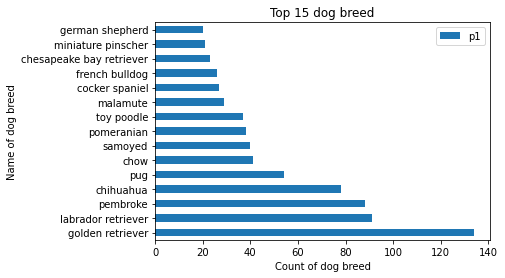

In [3233]:
fig1 = top15.plot(kind = 'barh')
plt.title ('Top 15 dog breed')
plt.xlabel('Count of dog breed')
plt.ylabel('Name of dog breed')

plt.show()

### Visualization #2: What are the most used dog names?

<function matplotlib.pyplot.show(close=None, block=None)>

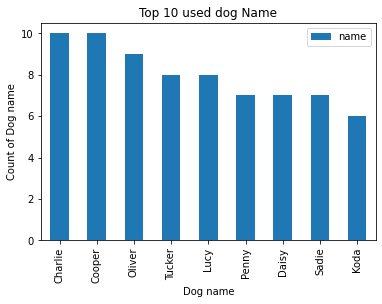

In [3234]:
dog_name.drop(['None']).plot(kind = 'bar')
plt.title ('Top 10 used dog Name')
plt.xlabel ('Dog name')
plt.ylabel ('Count of Dog name')
plt.show

### Visualization #3: How does the rating distribution looks like?

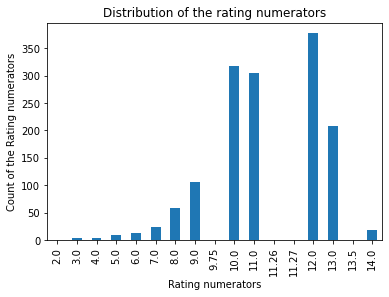

In [3235]:
rating.plot(kind = 'bar')
plt.title('Distribution of the rating numerators')
plt.xlabel('Rating numerators')
plt.ylabel('Count of the Rating numerators')
plt.show()